In [66]:
import invert_curl as inv
reload(inv)
import numpy as np
import scipy.fftpack as fft
from scipy.integrate import cumtrapz

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

import sys
sys.path.append('../vector_calculus/')
import vector_calculus as vc

In [67]:
x, y, z = np.meshgrid(np.linspace(-5, 5, 11),
                      np.linspace(-5, 5, 11),
                      np.linspace(-5, 5, 11))
mesh = [x, y, z]

In [68]:
Bx_uni = np.zeros(x.shape)
By_uni = np.zeros(x.shape)
Bz_uni = np.ones(x.shape)
B_uniform = [Bx_uni, By_uni, Bz_uni]

In [69]:
Bx = np.zeros(x.shape)
By = np.zeros(x.shape)
Bz = np.zeros(x.shape)
Ax = np.zeros(x.shape)
Ay = np.zeros(x.shape)
Az = np.zeros(x.shape)

mu_0I= 1.
a = 1.
theta = np.arctan2(y,x)
r = np.sqrt(x**2. + y**2.)
inside = np.where(r <= a)
outside = np.where(r > a)

inside = (inside[0], inside[1], inside[2])
outside = (outside[0], outside[1], outside[2])

Bx[inside] = -mu_0I*r[inside]/(2.*np.pi*a**2) * np.sin(theta[inside])
By[inside] = mu_0I*r[inside]/(2.*np.pi*a**2) * np.cos(theta[inside])
Bx[outside] = -mu_0I/(2.*np.pi*r[outside]) * np.sin(theta[outside])
By[outside] = mu_0I/(2.*np.pi*r[outside]) * np.cos(theta[outside])

Az[inside] = -mu_0I/(4.*np.pi*a**2)*(r[inside]**2 - a**2) 
Az[outside] = -mu_0I/(2.*np.pi)*np.log(r[outside]/a) 

B_wire = [Bx, By, Bz]

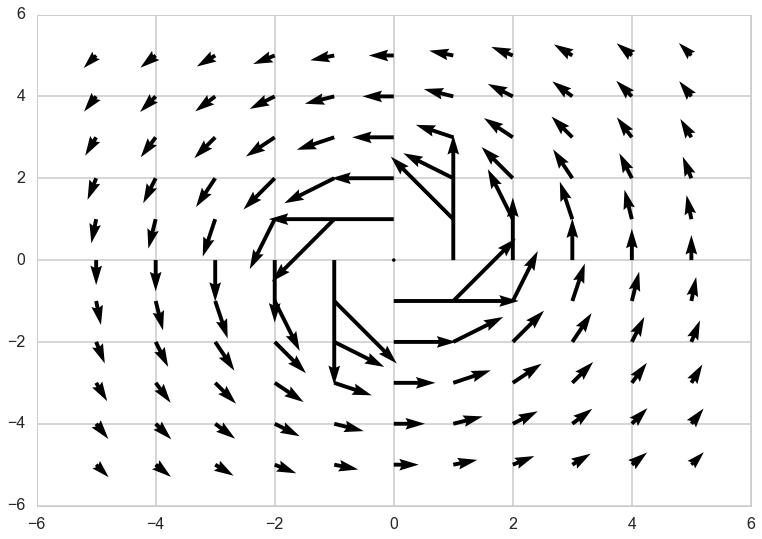

In [70]:
plt.quiver(x[:, :, 0], y[:, :, 0], 
           Bx[:, :, 0], By[:, :, 0])

In [71]:
mesh[0].shape

(11, 11, 11)

In [72]:
Ax_from_B_uniform, Ay_from_B_uniform = inv.devore_invert_curl(mesh, B_uniform)

In [73]:
B_reconstructed_uniform = vc.curl([Ax_from_B_uniform, 
                                   Ay_from_B_uniform, 
                                   np.zeros(mesh[0].shape)], 
                                  mesh=mesh)

In [76]:
B_reconstructed_uniform[2]

array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       ..., 
       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1., 

In [77]:
Ax_from_B_wire, Ay_from_B_wire = inv.devore_invert_curl(mesh, B_wire)

In [78]:
B_reconstructed_wire = vc.curl([Ax_from_B_wire, 
                                   Ay_from_B_wire, 
                                   np.zeros(mesh[0].shape)], 
                                  mesh=mesh)

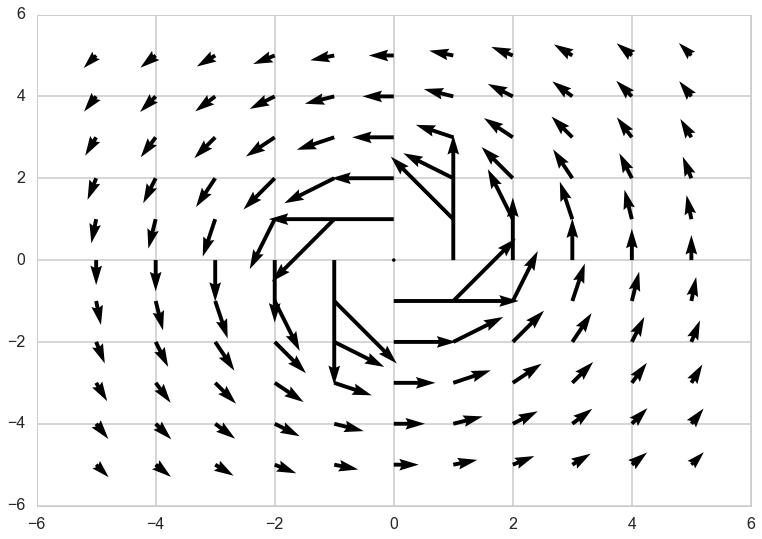

In [80]:
plt.quiver(x[:, :, 0], y[:, :, 0], 
           B_reconstructed_wire[0][:, :, 0], B_reconstructed_wire[1][:, :, 0])